# Setup

In [1]:
!pip install sigtech

In [2]:
import sigtech.api as sig
import os

os.environ["SIGTECH_API_KEY"] = ""

# Usage

In [3]:
?sig.ReinvestmentStrategy

Init signature: sig.ReinvestmentStrategy(underlyer: str, _api_call: bool = False)
Docstring:     
ReinvestmentStrategy - Total return class for handling corporate actions for
underlying stock/ETF.

Note: 'get_single_stock_strategy' should be used for single stock
ReinvestmentStrategy generation.

Internally the strategy constructs holding periods of the underlyer based
on the filter lists and expiry date setting of the underlyer.

The building block schedules decisions for handling corporation actions
throughout the lifetime of the strategy.

:param underlyer: Identifier for underlying instrument.
Init docstring:
Initialize a FrameworkApiObject with a given creation_response.

:param creation_response: The creation_response to associate with the object.
File:           ~/opt/anaconda3/envs/sigtech/lib/python3.11/site-packages/sigtech/api/framework/reinvestment_strategy.py
Type:           ABCMeta
Subclasses:     

In [4]:
?sig.RollingFutureStrategy

Init signature:
sig.RollingFutureStrategy(
    contract_code: str,
    contract_sector: str,
    currency: Optional[str] = None,
    rolling_rule: Optional[str] = None,
    front_offset: Optional[str] = None,
    start_date: Union[str, datetime.date, NoneType] = None,
    monthly_roll_days: Optional[str] = None,
    total_return: Optional[bool] = None,
)
Docstring:     
RollingFutureStrategy class implements rolling future strategies,
potentially rolled over multiple days.

:param contract_code: Contract code for futures contract group to trade.
:param contract_sector: Contract sector for futures contract group to trade.
:param currency: Base strategy currency for initial cash and valuation,
                (optional) defaults to future currency.
:param rolling_rule: Rule to apply when rolling. Common options include
                    'front' and 'f_0'.
:param front_offset: If using 'front' as 'rolling_rule', this parameter
                    specifies the number of business days be

In [5]:
?sig.BasketStrategy

Init signature:
sig.BasketStrategy(
    constituent_names: List[Union[str, sigtech.api.framework.framework_api_object.FrameworkApiObject]],
    weights: List[float],
    currency: Optional[str] = 'USD',
    rebalance_frequency: str = 'EOM',
    start_date: Union[str, datetime.date, NoneType] = None,
    ticker: Optional[str] = None,
)
Docstring:     
BasketStrategy class implements a long-only basket strategy with fixed weights,
rebalanced as per the rebalance frequency.

:param constituent_names: List of constituent tickers.
:param weights: List of constituents weights expressed as floats.
:param currency: Base strategy currency for initial cash and valuation.
    Defaults to 'USD'.
:param rebalance_frequency: Rebalance frequency. For example: '1BD', '2BD', '1W',
    '2W', '1M', '2M', '1W-WED', '1W-FRI', '3M_IMM', 'SOM', 'EOM', 'YEARLY', '1DOM',
    and variations of these. Defaults to 'EOM'.
:param start_date: Start of strategy. Optional.
:param ticker: Name of strategy (optional).
I

In [6]:
?sig.SignalStrategy

Init signature:
sig.SignalStrategy(
    signal_input: pandas.core.frame.DataFrame,
    currency: Optional[str] = 'USD',
    rebalance_frequency: str = 'EOM',
    start_date: Union[str, datetime.date, NoneType] = None,
    ticker: Optional[str] = None,
)
Docstring:     
SignalStrategy class implements a basket of instruments that change through time
based on a signal.

:param signal_input: DataFrame of weights through time.
:param currency: Base strategy currency for initial cash and valuation,
                (optional) defaults to 'USD'.
:param rebalance_frequency: Rebalance frequency. For example: '1BD', '2BD', '1W',
                        '2W', '1M', '2M', '1W-WED', '1W-FRI', '3M_IMM', 'SOM',
                        'EOM', 'YEARLY', '1DOM', and variations of these,
                        (optional) defaults to 'EOM'.
:param start_date: Start of strategy (optional).
:param ticker: Name of strategy (optional).
Init docstring:
Initialize a FrameworkApiObject with a given creation_res

## Basic Example - Golden Crossover

In [7]:
import datetime
import pandas as pd
import numpy as np

sig.init()

In [8]:
g_cross = sig.RollingFutureStrategy(
    contract_code="ES",
    contract_sector="INDEX",
    currency="USD",
    start_date="2022-01-01",
)

g_cross.history()

date
2022-01-03    1000.000000
2022-01-04    1000.001389
2022-01-05     980.832280
2022-01-06     979.788929
2022-01-07     975.663671
                 ...     
2024-02-09    1074.891797
2024-02-12    1074.786163
2024-02-13    1060.148643
2024-02-14    1070.186663
2024-02-15    1076.368622
Name: USD ES INDEX LONG FRONT 7ABB8925 RFS STRATEGY, Length: 534, dtype: float64

In [9]:
df = pd.DataFrame(g_cross.history().rename(g_cross.name)).dropna()

df["5d_sma"] = df[g_cross.name].rolling(5).mean().dropna()
df["15d_sma"] = df[g_cross.name].rolling(15).mean().dropna()
df.dropna(inplace=True)
df.tail(10)

,USD ES INDEX LONG FRONT 7ABB8925 RFS STRATEGY,5d_sma,15d_sma
date,,,
2024-02-02,1060.318930,1050.857390,1038.632843
2024-02-05,1056.931462,1051.392302,1040.928478
2024-02-06,1059.782648,1052.614252,1043.627619
2024-02-07,1068.499539,1058.951589,1047.281857
2024-02-08,1069.185573,1062.943630,1050.408184
2024-02-09,1074.891797,1065.858204,1053.084026
2024-02-12,1074.786163,1069.429144,1055.560249
2024-02-13,1060.148643,1069.502343,1056.853153
2024-02-14,1070.186663,1069.839768,1058.762750


In [10]:
df["signal"] = np.where((df["5d_sma"] > df["15d_sma"]), 1, -1)
df.head(10)

,USD ES INDEX LONG FRONT 7ABB8925 RFS STRATEGY,5d_sma,15d_sma,signal
date,,,,
2022-01-24,920.524693,934.948172,966.675997,-1
2022-01-25,909.086356,925.662323,960.615088,-1
2022-01-26,907.520295,918.027057,954.449682,-1
2022-01-27,902.559165,911.467836,949.231474,-1
2022-01-28,924.603628,912.858827,945.552454,-1
2022-01-31,941.531073,917.060104,943.276947,-1
2022-02-01,947.957370,924.834306,941.506202,-1
2022-02-02,956.786518,934.687551,939.728489,-1
2022-02-03,934.169794,941.009677,936.286197,1


In [11]:
signal = sig.SignalStrategy(
    currency="USD",
    signal_input=df[["signal"]].rename(columns={"signal": g_cross.name}),
    start_date=df.first_valid_index().date(),
    rebalance_frequency="1W",
)

<Axes: xlabel='date'>

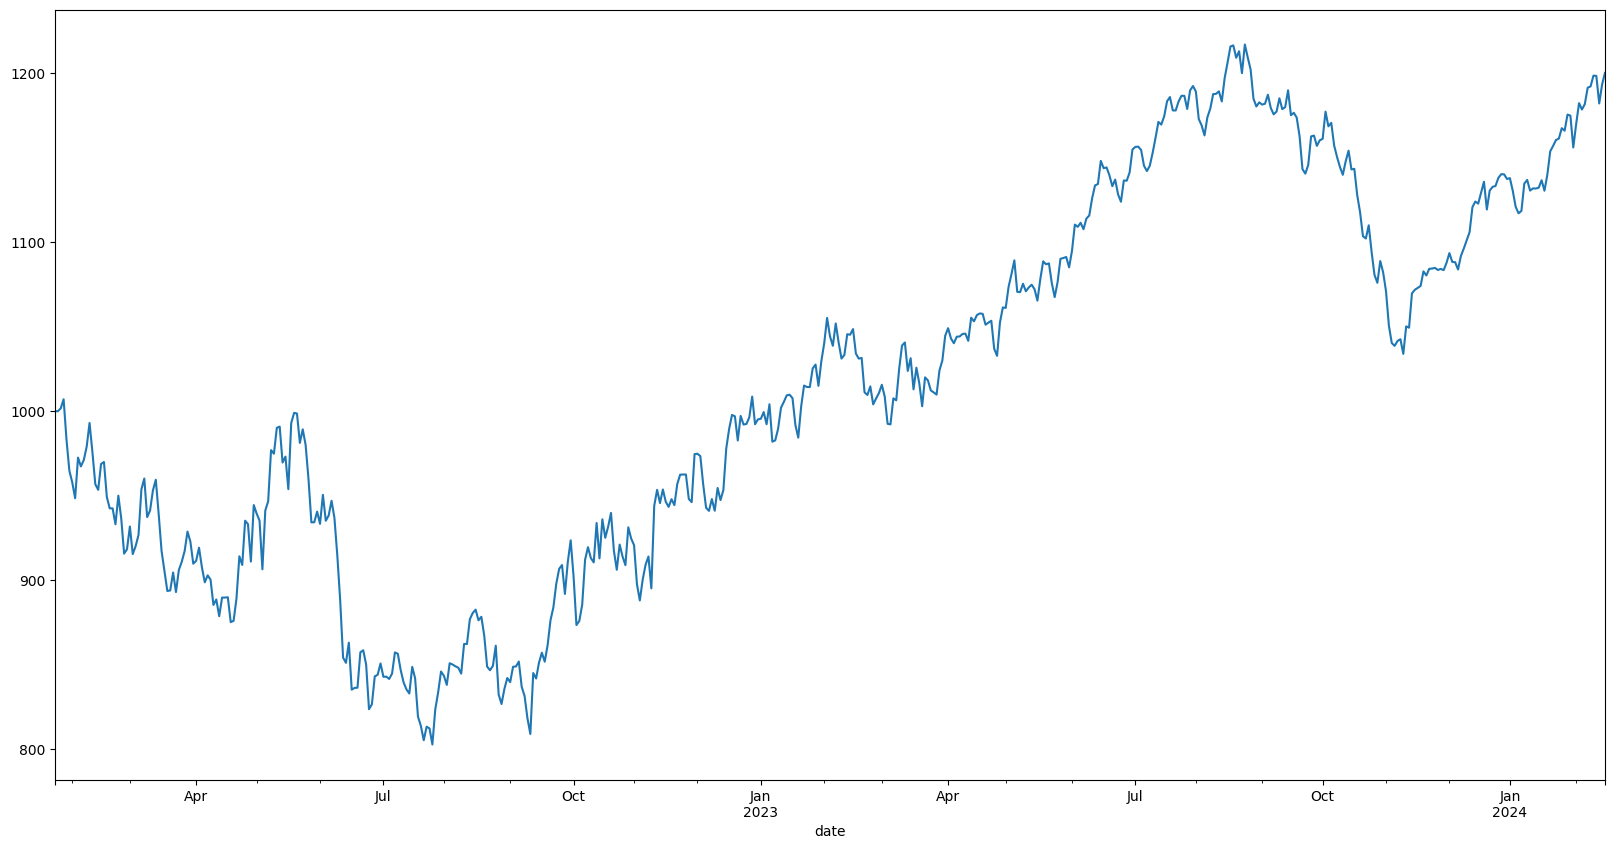

In [12]:
signal.history().plot(figsize=(20, 10))

In [13]:
signal.history().tail(10)

date
2024-02-02    1182.210877
2024-02-05    1178.433995
2024-02-06    1181.612947
2024-02-07    1191.331912
2024-02-08    1192.096811
2024-02-09    1198.459010
2024-02-12    1198.341232
2024-02-13    1182.021015
2024-02-14    1193.212984
2024-02-15    1200.105608
Name: USD CBF7B163 SS STRATEGY, dtype: float64

In [14]:
import pyfolio as pf

%matplotlib inline

# silence warnings
import warnings

warnings.filterwarnings("ignore")

/Users/igor/opt/anaconda3/envs/sigtech/lib/python3.11/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [15]:
g_cross_returns = signal.history().pct_change().dropna()

Start date,2022-01-25
End date,2024-02-15
Total months,25
,Backtest
Annual return,8.92%
Cumulative returns,20.011%
Annual volatility,18.702%
Sharpe ratio,0.55
Calmar ratio,0.44
Stability,0.70
Max drawdown,-20.275%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.27,2022-01-27,2022-07-26,2022-12-28,240
1,15.03,2023-08-24,2023-11-09,NaT,NaN
2,5.96,2023-02-02,2023-03-06,2023-04-13,51
3,2.64,2022-12-28,2023-01-06,2023-01-13,13
4,2.51,2023-01-16,2023-01-19,2023-01-23,6


Stress Events,mean,min,max
New Normal,0.04%,-3.80%,5.46%


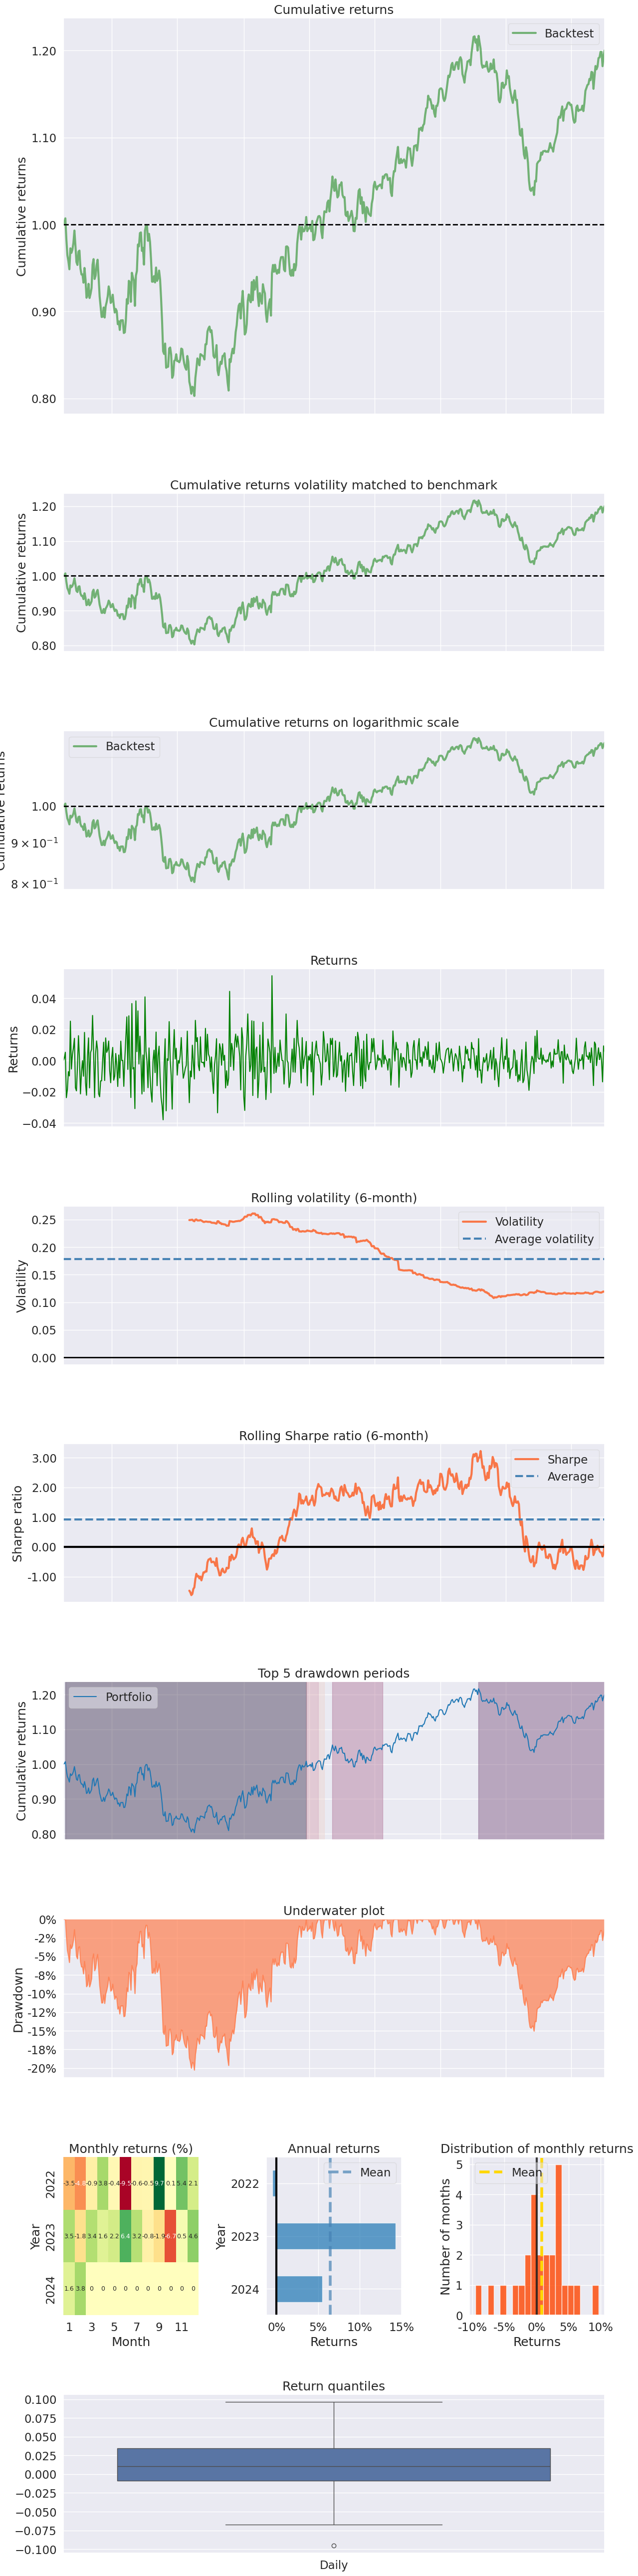

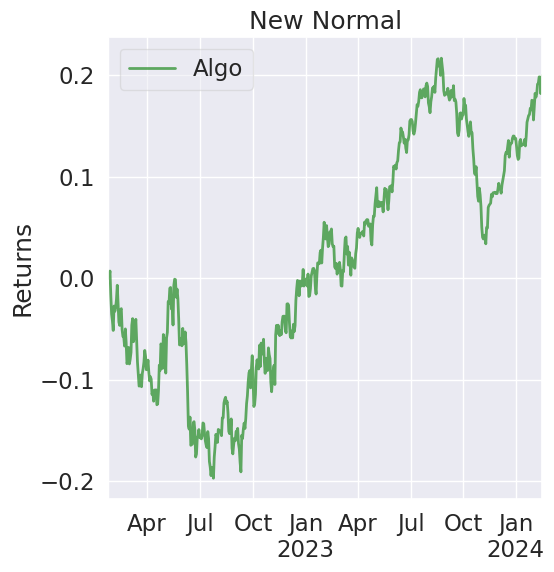

In [16]:
# generate the performance report
pf.create_full_tear_sheet(g_cross_returns)

## Pairs Trading

In [17]:
# Soybeans
s = sig.RollingFutureStrategy(
    currency="USD",
    start_date=datetime.date(2020, 1, 1),
    contract_code="S",
    contract_sector="COMDTY",
    monthly_roll_days="5:9",
    rolling_rule="f_0",
)

# Soybean Oil
bo = sig.RollingFutureStrategy(
    currency="USD",
    start_date=datetime.date(2020, 1, 1),
    contract_code="BO",
    contract_sector="COMDTY",
    monthly_roll_days="5:9",
    rolling_rule="f_0",
)

In [18]:
s_df = pd.DataFrame(s.history().rename(s.name)).dropna()
bo_df = pd.DataFrame(bo.history().rename(bo.name)).dropna()

In [19]:
s_df["5d_sma"] = s_df[s.name].rolling(5).mean().dropna()
bo_df["5d_sma"] = bo_df[bo.name].rolling(5).mean().dropna()

# create short and long signals where -1 is short and 1 is long and 0 is no position
s_df["short_signal"] = np.where((s_df["5d_sma"] > bo_df["5d_sma"] * 1.05), -1, 0)
s_df["long_signal"] = np.where((s_df["5d_sma"] < bo_df["5d_sma"] * 0.95), 1, 0)

bo_df["short_signal"] = np.where((s_df["5d_sma"] > bo_df["5d_sma"] * 1.05), 1, 0)
bo_df["long_signal"] = np.where((s_df["5d_sma"] < bo_df["5d_sma"] * 0.95), -1, 0)

s_df["signal"] = s_df["short_signal"] + s_df["long_signal"]
bo_df["signal"] = bo_df["short_signal"] + bo_df["long_signal"]

combined_df = pd.concat([s_df["signal"], bo_df["signal"]], axis=1)
combined_df.columns = [s.name, bo.name]
combined_df.head(30)

,USD S COMDTY LONG F_0 AE105B92 RFS STRATEGY,USD BO COMDTY LONG F_0 694241E4 RFS STRATEGY
date,,
2020-01-02,0,0
2020-01-03,0,0
2020-01-06,0,0
2020-01-07,0,0
2020-01-08,0,0
2020-01-09,0,0
2020-01-10,0,0
2020-01-13,0,0
2020-01-14,0,0


<Axes: xlabel='date'>

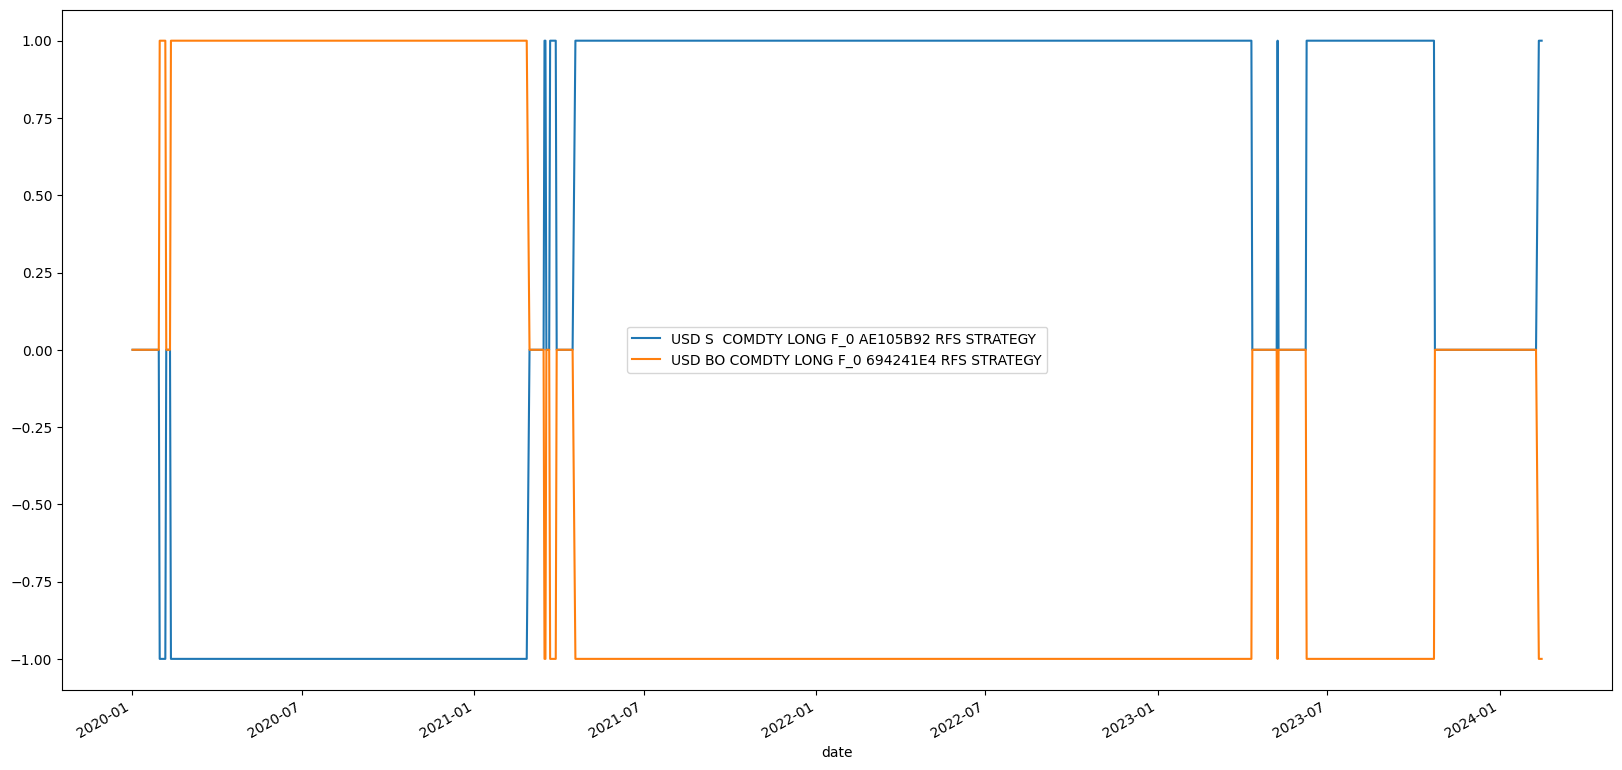

In [20]:
combined_df.plot(figsize=(20, 10))

In [21]:
combined_signal = sig.SignalStrategy(
    currency="USD",
    signal_input=combined_df,
    start_date=combined_df.first_valid_index().date(),
    rebalance_frequency="EOM",
)

<Axes: xlabel='date'>

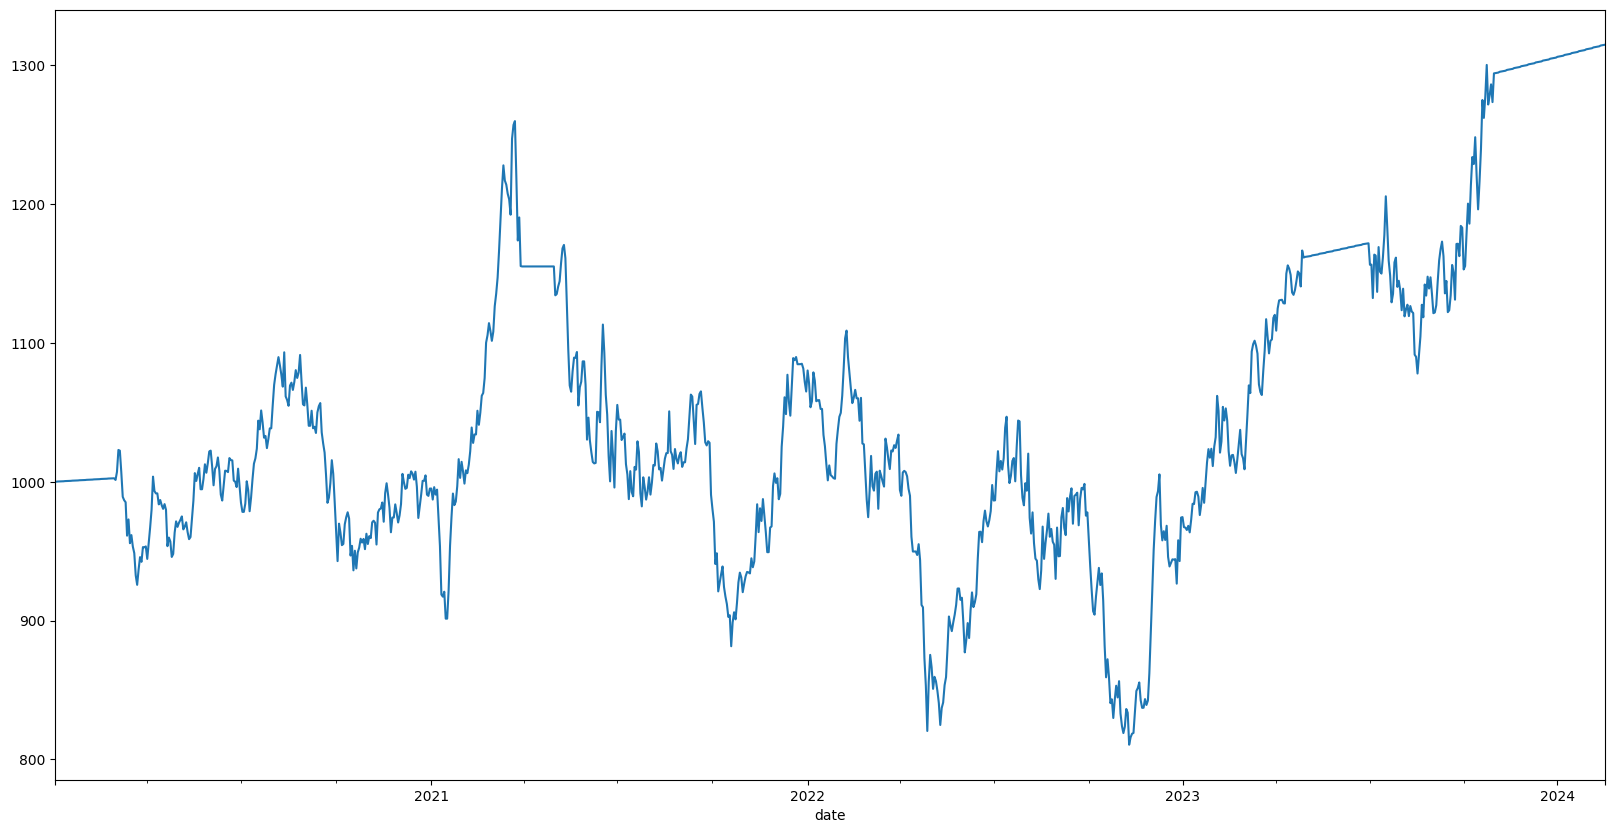

In [22]:
combined_signal.history().plot(figsize=(20, 10))

Start date,2020-01-03
End date,2024-02-15
Total months,51
,Backtest
Annual return,6.625%
Cumulative returns,31.473%
Annual volatility,20.727%
Sharpe ratio,0.41
Calmar ratio,0.19
Stability,0.21
Max drawdown,-35.652%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.65,2021-03-24,2022-11-10,2023-10-19,672
1,17.55,2020-08-12,2021-01-15,2021-02-24,141
2,9.49,2020-03-04,2020-03-23,2020-07-16,97
3,2.89,2021-03-12,2021-03-19,2021-03-22,7
4,2.58,2020-07-21,2020-07-27,2020-07-31,9


Stress Events,mean,min,max
New Normal,0.03%,-4.53%,4.59%


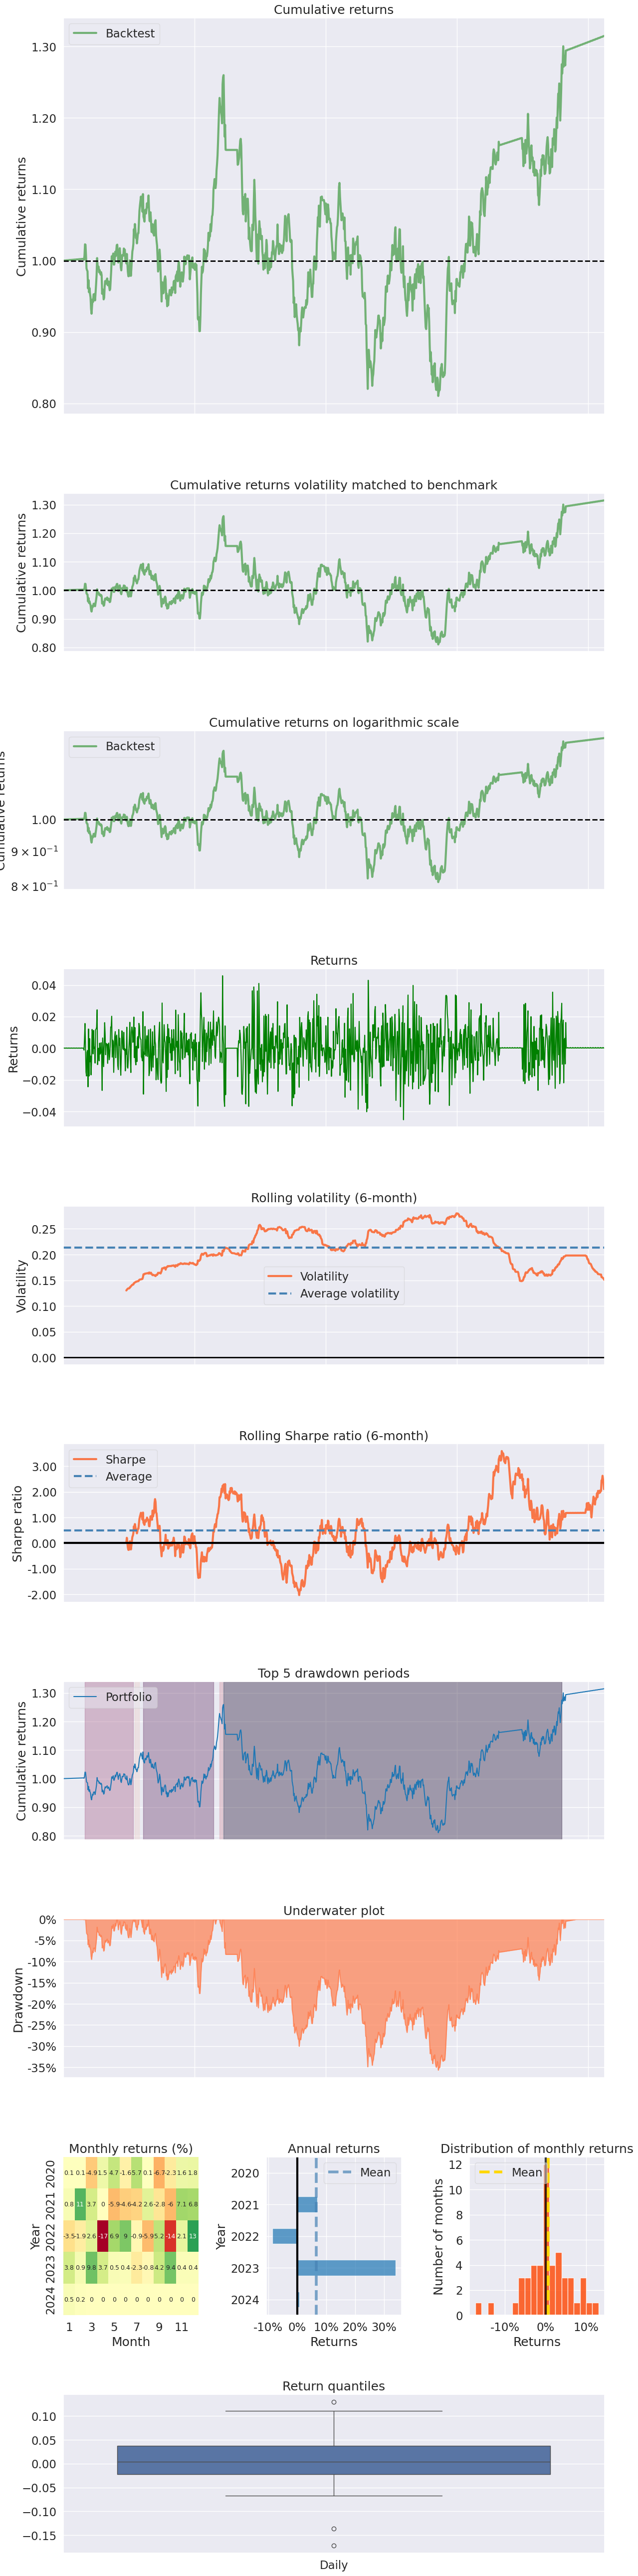

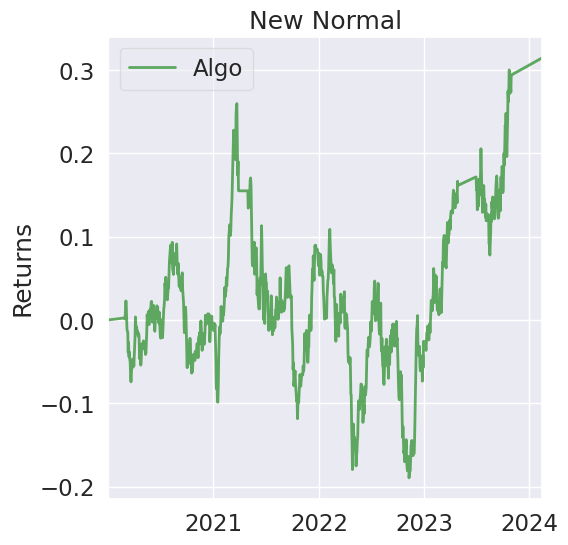

In [23]:
df_returns = combined_signal.history().pct_change().dropna()

pf.create_full_tear_sheet(df_returns)

In [24]:
combined_signal.plot.portfolio_table(
    dts="ACTION_PTS",
    unit_type="TRADE",
    flatten=True,
    as_df=True,
).head(10)

Execution Time  \
Date                 Name                     Level                         
2020/01/02, 07:30:00 USD C0FC4CE4 SS STRATEGY 1                         -   
                     USD CASH                 2                         -   
2020/01/03, 07:30:00 USD C0FC4CE4 SS STRATEGY 1                         -   
                     USD CASH                 2                         -   
2020/01/31, 07:30:00 USD C0FC4CE4 SS STRATEGY 1                         -   
                     USD CASH                 2                         -   
2020/02/28, 07:30:00 USD C0FC4CE4 SS STRATEGY 1                         -   
                     USD CASH                 2                         -   
                     BOK20 COMDTY             2      2020/02/28, 19:15:00   
                     S K20 COMDTY             2      2020/02/28, 19:15:00   

                                                     Weight Exp. Weight  \
Date                 Name                     Level                       
2020/01/02, 07:30:00 USD C0FC4CE4 SS STRATEGY 1      100.0%           -   
                     USD CASH                 2      100.0%      100.0%   
2020/01/03, 07:30:00 USD C0FC4CE4 SS STRATEGY 1      100.0%           -   
                     USD CASH                 2      100.0%      100.0%   
2020/01/31, 07:30:00 USD C0FC4CE4 SS STRATEGY 1      100.0%           -   
                     USD CASH                 2      100.0%      100.0%   
2020/02/28, 07:30:00 USD C0FC4CE4 SS STRATEGY 1      100.0%           -   
                     USD CASH                 2      100.0%      100.0%   
                     BOK20 COMDTY             2        0.0%           -   
                     S K20 COMDTY             2        0.0%           -   

                                                    Valuation     Units  \
Date                 Name                     Level                       
2020/01/02, 07:30:00 USD C0FC4CE4 SS STRATEGY 1        1000.0       1.0   
                     USD CASH                 2        1000.0    1000.0   
2020/01/03, 07:30:00 USD C0FC4CE4 SS STRATEGY 1      1000.043       1.0   
                     USD CASH                 2      1000.043  1000.043   
2020/01/31, 07:30:00 USD C0FC4CE4 SS STRATEGY 1      1001.247       1.0   
                     USD CASH                 2      1001.247  1001.247   
2020/02/28, 07:30:00 USD C0FC4CE4 SS STRATEGY 1      1002.483       1.0   
                     USD CASH                 2      1002.483  1002.483   
                     BOK20 COMDTY             2           0.0     0.057   
                     S K20 COMDTY             2           0.0    -0.022   

                                                    Value (USD) Value (local)  \
Date                 Name                     Level                             
2020/01/02, 07:30:00 USD C0FC4CE4 SS STRATEGY 1          1000.0        1000.0   
                     USD CASH                 2             1.0           1.0   
2020/01/03, 07:30:00 USD C0FC4CE4 SS STRATEGY 1        1000.043      1000.043   
                     USD CASH                 2             1.0           1.0   
2020/01/31, 07:30:00 USD C0FC4CE4 SS STRATEGY 1        1001.247      1001.247   
                     USD CASH                 2             1.0           1.0   
2020/02/28, 07:30:00 USD C0FC4CE4 SS STRATEGY 1        1002.483      1002.483   
                     USD CASH                 2             1.0           1.0   
                     BOK20 COMDTY             2             0.0           0.0   
                     S K20 COMDTY             2             0.0           0.0   

                                                    Position Type  
Date                 Name                     Level                
2020/01/02, 07:30:00 USD C0FC4CE4 SS STRATEGY 1          Strategy  
                     USD CASH                 2              Cash  
2020/01/03, 07:30:00 USD C0FC4CE4 SS STRATEGY 1          Strategy  
                   